### Import neccasary modules

In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np
from ipywidgets import interact

### Import data

In [2]:
mydata = 'bayou_combined.csv'
df = pd.read_csv(mydata,
                 dtype={'Cross_sect':str})
df.set_index('Cross_sect',inplace=True)

### Define plotting fuction

In [5]:
def plotting(node,comb_100,comb_500):
    
    #Initialize figure and set dimensions
    fig = plt.figure(figsize = (12,6))
    gs = gridspec.GridSpec(1,2, width_ratios=[7,3])
    ax1 = fig.add_subplot(gs[0,0])
    ax1.set_ylim([0.001,1])
    ax1.set_yscale('log')
    ax1.set_xlabel('Elevation, feet')
    ax1.set_ylabel('Rate, Events per year')

    #This is the data
    ydata = [0.002, 0.01, 0.02, 0.1]
    xdata_river = [df['R_WSEL_500'][node],df['R_WSEL_100'][node],
                   df['R_WSEL_50'][node],df['R_WSEL_10'][node]]
    xdata_coast = [df['C_WSEL_500'][node],df['C_WSEL_100'][node]]

    #Fit funtion to WSEL data
    fit_river = np.polyfit(xdata_river,np.log10(ydata),2)
    fit_coast = np.polyfit(xdata_coast,np.log10(ydata[0:2]),1)
    river = np.poly1d(fit_river)
    coast = np.poly1d(fit_coast)

    #Calculate combined probability
    combined_100 = 10**coast(comb_100)+10**river(comb_100)
    combined_500 = 10**coast(comb_500)+10**river(comb_500)    
    
    #Plot Data
    ax1.plot(xdata_river, ydata,      linewidth=2, label='River')
    ax1.plot(xdata_coast, ydata[0:2], linewidth=2, label='Coast')
    ax1.plot(xdata_river, 10**(river(xdata_river)), '-o', label='River_Fit')
    ax1.plot(xdata_coast, 10**(coast(xdata_coast)), '-o', label='Coast_Fit') 
    ax1.plot([comb_100,comb_500],[combined_100,combined_500], 
             linewidth=2.25, label = 'Combined')

    #Add text
    ax1.annotate('Cross-section: '+str(node)+'\n\n'
                 +str('%.0f' %(1/combined_100))+'yr return period:\n    '
                 +str(comb_100)+' ft predicted flood elevation\n\n'
                 +str('%.0f' %(1/combined_500))+'yr return period:\n    '
                 +str(comb_500)+' ft predicted flood elevation',
                 xy = (0.66,0.65),
                 xycoords = 'figure fraction',
                 fontsize=14
                )
    
    #Add legend
    ax1.legend()

### Interact with funtion

<function __main__.plotting>

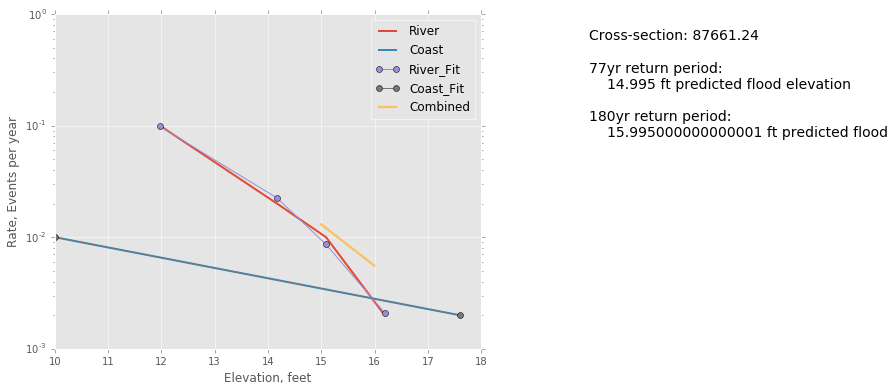

In [6]:
interact(plotting, node = df.index.tolist(),
         comb_100 = [10,21,0.005], comb_500 = [10,22,0.005])